<a href="https://colab.research.google.com/github/ZyMiKcs/KR_AI/blob/main/Diabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Импорт необходимых библиотек
import numpy as np
import pandas as pd

# Импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт обучаемой модели
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Импорт библиотеки сэмплеров
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.pipeline import make_pipeline

# Импорт библиотек для отображения виджетов
import ipywidgets as widgets
from IPython.display import display

# Установим десятичный формат
pd.options.display.float_format = "{:.2f}".format

In [ ]:
# Загрузка данных из таблицы в переменную DataFrame
df = pd.read_csv("./diabetes_prediction_dataset.csv")

In [ ]:
# Вывод первых строк
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [ ]:
# Обработка дубликатов
duplicate_rows_data = df[df.duplicated()]
print("Количество дубликатных строк: ", duplicate_rows_data.shape)

Количество дубликатных строк:  (3854, 9)


In [ ]:
# Избавимся от дубликатов
df = df.drop_duplicates()

In [ ]:
# Количество уникальных значений в столбцах
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} unique values")

gender: 3 unique values
age: 102 unique values
hypertension: 2 unique values
heart_disease: 2 unique values
smoking_history: 6 unique values
bmi: 4247 unique values
HbA1c_level: 18 unique values
blood_glucose_level: 18 unique values
diabetes: 2 unique values


In [ ]:
# Проверка на нулевые значения
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Удалим ненужные строки из датасета
df = df[df['gender'] != 'Other']

In [ ]:
# Генерация статического описания данных
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


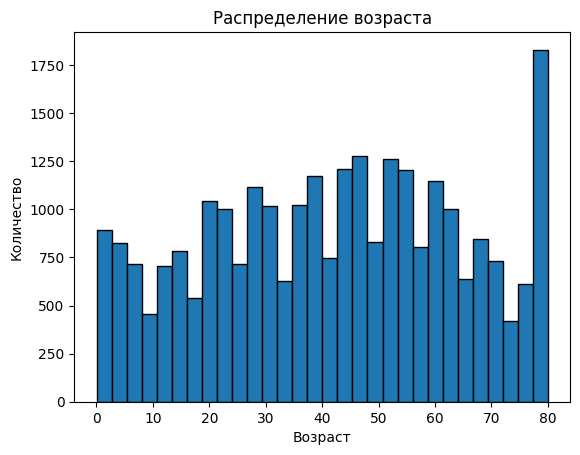

In [ ]:
# Гистограмма для распределения возраста
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество'
plt.show()

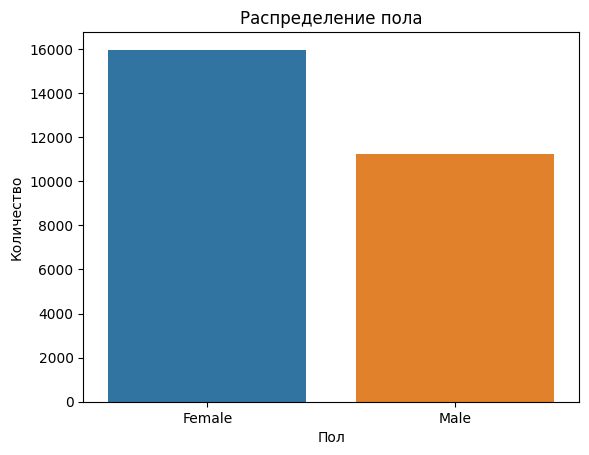

In [ ]:
# Столбчатая диаграмма для распределения пола
sns.countplot(x='gender', data=df)
plt.title('Распределение пола')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

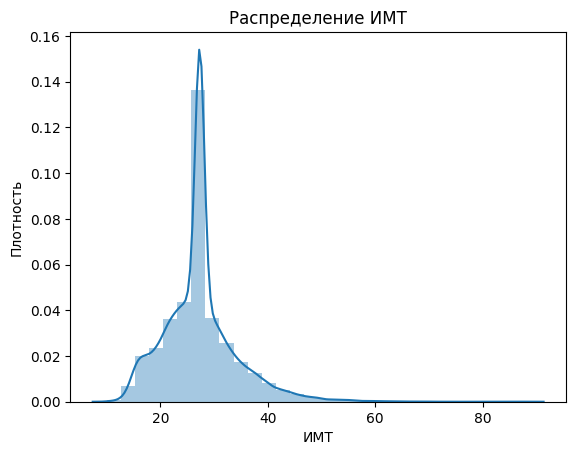

In [ ]:
# График распределения индекса массы тела
sns.distplot(df['bmi'], bins=30)
plt.title('Распределение ИМТ')
plt.xlabel('ИМТ')
plt.ylabel('Плотность')
plt.show()


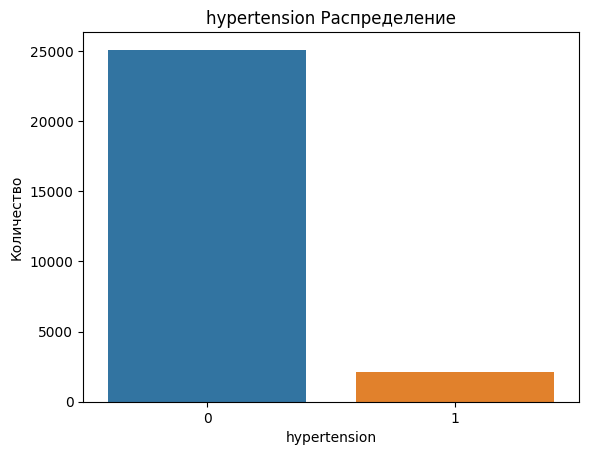

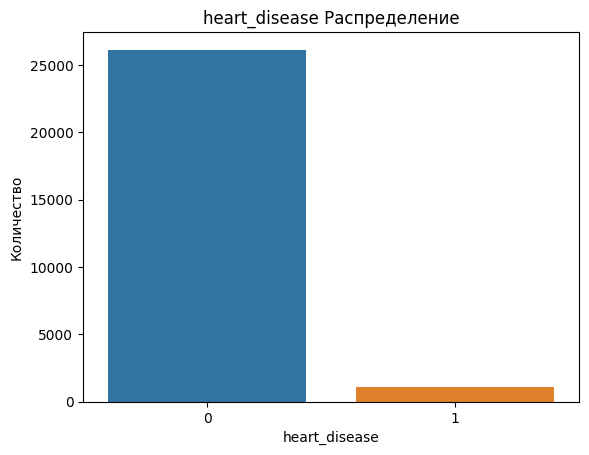

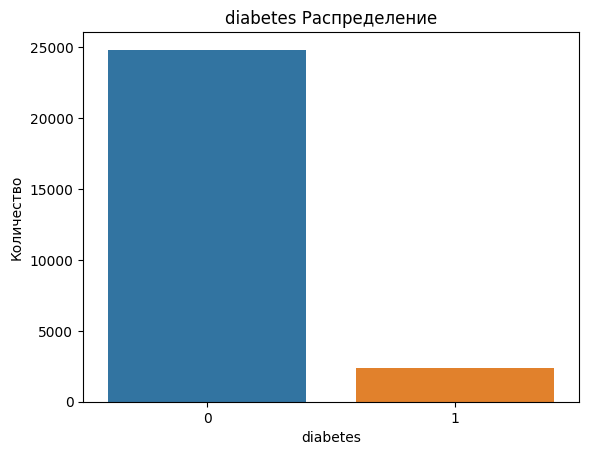

In [ ]:
# Количественные диаграммы для бинарных значений (Гипертония, сердечное заболевание, диабет)
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Распределение')
    plt.ylabel('Количество')
    plt.show()

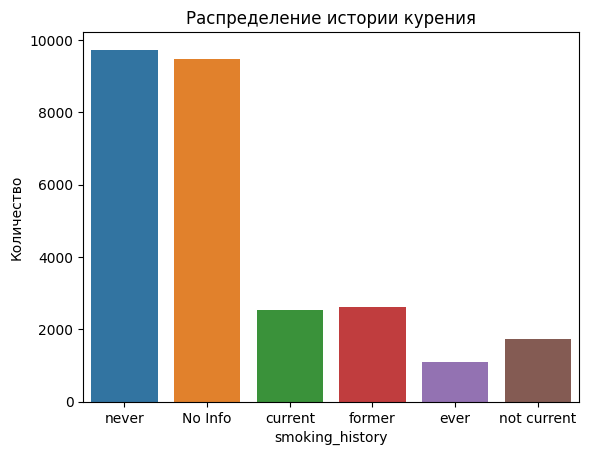

In [ ]:
# Количественная диаграмма для значения smoking_history
sns.countplot(x='smoking_history', data=df)
plt.title('Распределение истории курения')
plt.ylabel('Количество')
plt.show()

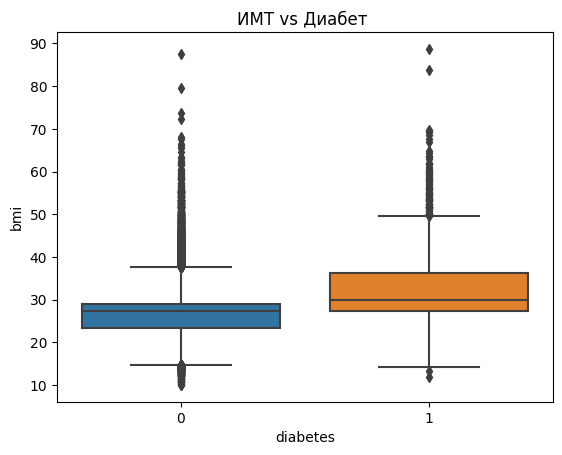

In [ ]:
# Boxplot для ИМТ в соответствии с диабетом
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('ИМТ vs Диабет ')
plt.show()

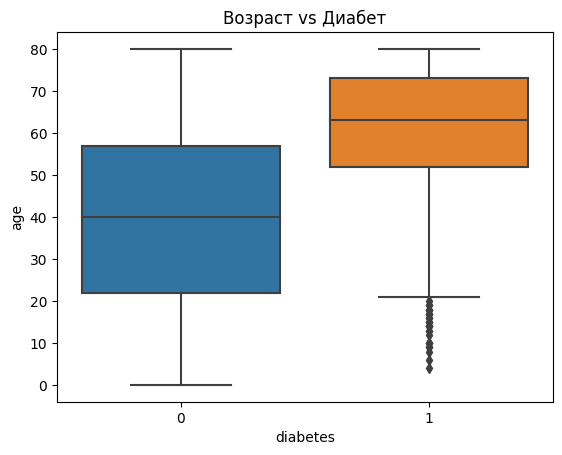

In [ ]:
# Boxplot Возраст vs Диабет
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Возраст vs Диабет')
plt.show()

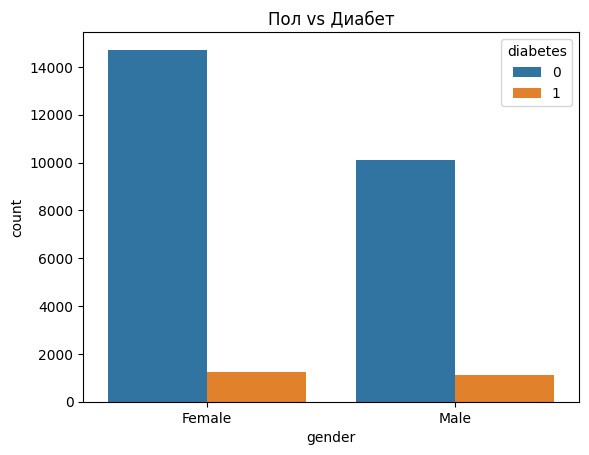

In [ ]:
# Количественная диаграмма количества людей болеющих диабетов для каждого пола
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Пол vs Диабет')
plt.show()

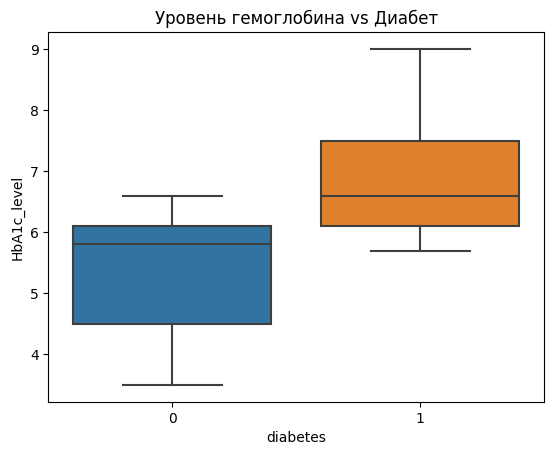

In [ ]:
# Boxplot уровень гемоглобина vs диабет
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('Уровень гемоглобина vs Диабет')
plt.show()

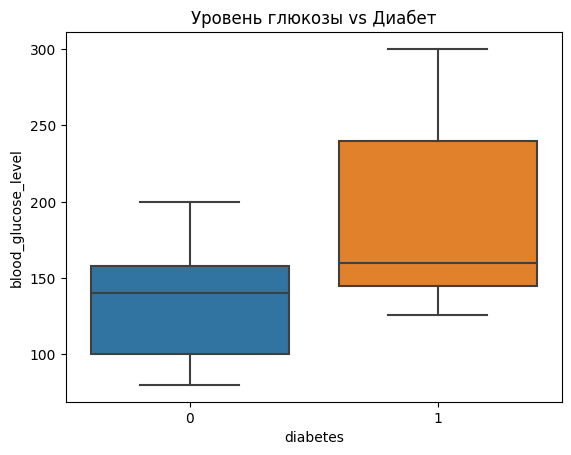

In [ ]:
# Boxplot уровень глюкозы в крови vs Диабет
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Уровень глюкозы vs Диабет')
plt.show()

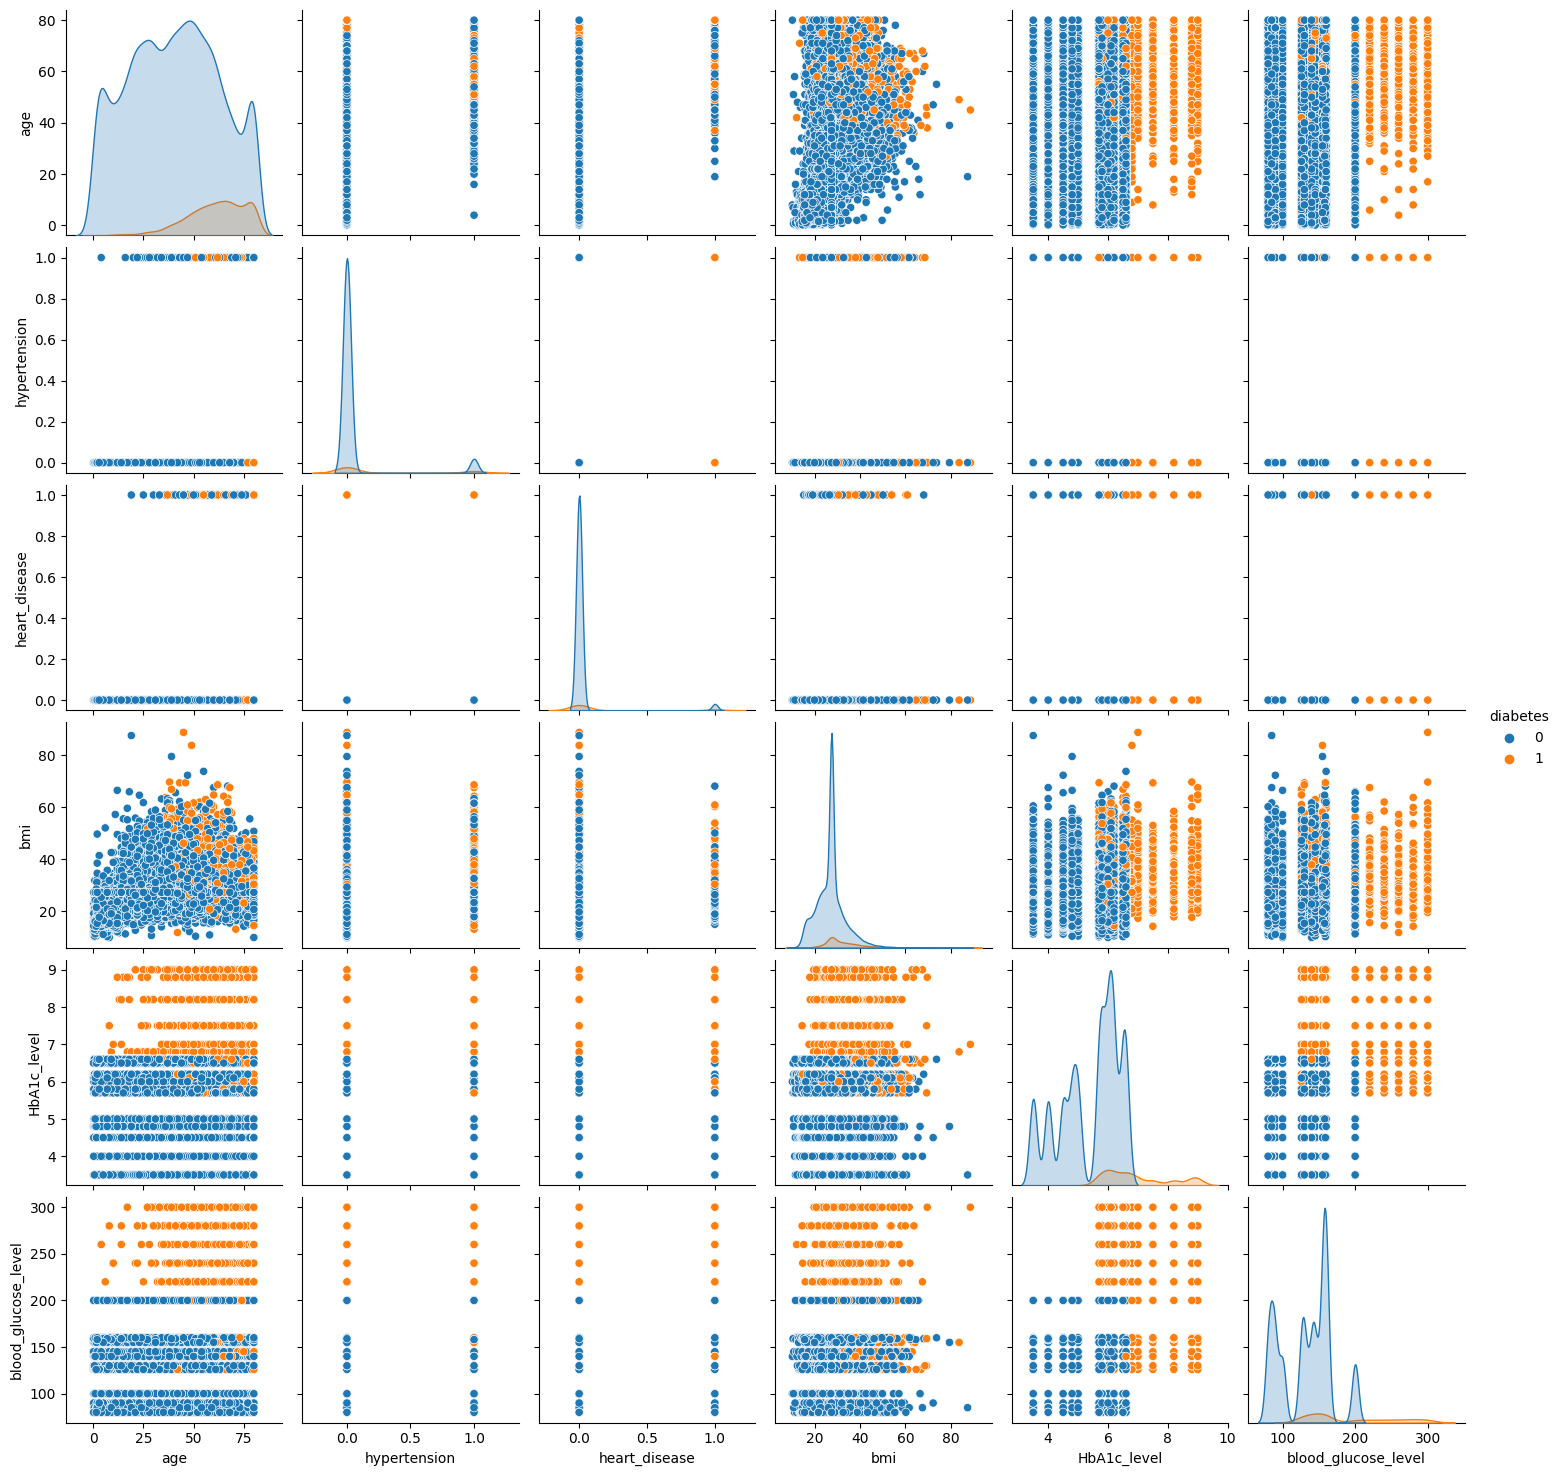

In [ ]:
# График пар для числовых признаков в зависимости от наличия диабета
sns.pairplot(df, hue='diabetes')
plt.show()

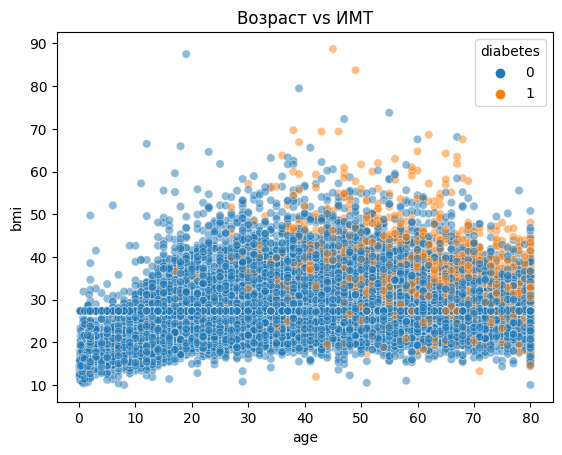

In [ ]:
# Точечная диаграмма возраст vs ИМТ раскрашены в зависимости от наличия диабета
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, alpha=0.5)
plt.title('Возраст vs ИМТ')
plt.show()

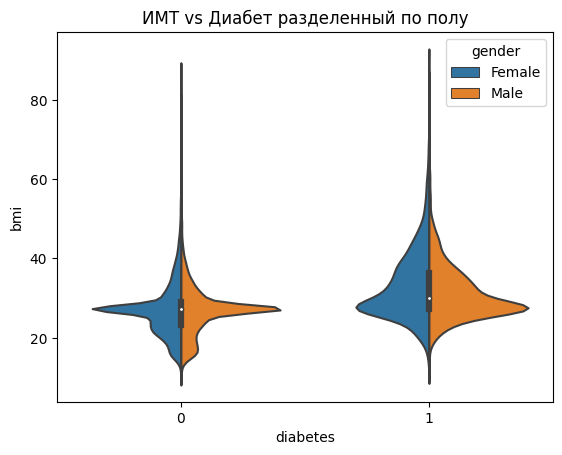

In [ ]:
# Виолиновая диаграмма ИМТ разделенных по полу и наличию диабета
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('ИМТ vs Диабет разделенный по полу')
plt.show()

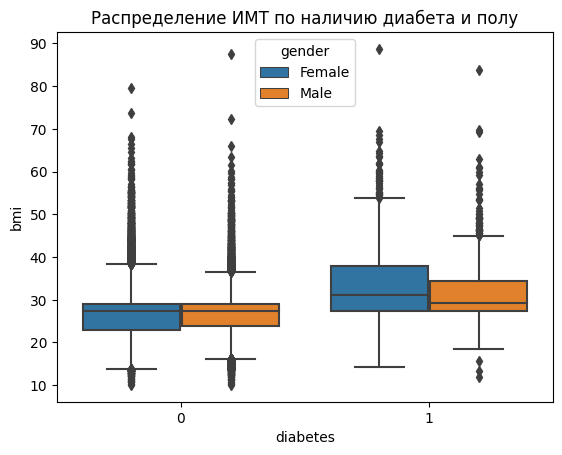

In [ ]:
# распределение индекса массы тела в зависимости от статуса диабета и пола
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('Распределение ИМТ по наличию диабета и полу')
plt.show()

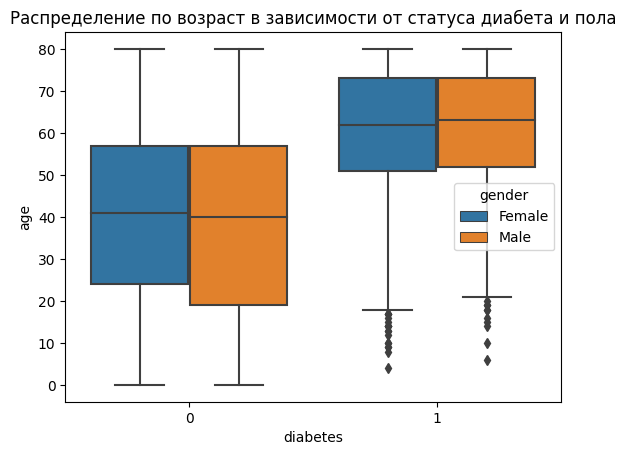

In [ ]:
#  распределение возраста в зависимости от статуса диабета и пола
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Распределение по возраст в зависимости от статуса диабета и пола')
plt.show()

In [ ]:
# Функция для объединения значений smoking_history в новые
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Переопределение значений столбца
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Посмотрим количество новых значений
print(df['smoking_history'].value_counts())

current    9197
Name: smoking_history, dtype: int64


In [ ]:
# Скопируем данные
data = df.copy()

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Применяем кодирование one-hot для указанного столбца
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Удалить исходный столбец и добавить новые дамми-столбцы в датафрейм
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Применить one-hot кодирование на значения гендера
data = perform_one_hot_encoding(data, 'gender')

# Применить one-hot кодирование на значения smoking_history
data = perform_one_hot_encoding(data, 'smoking_history')

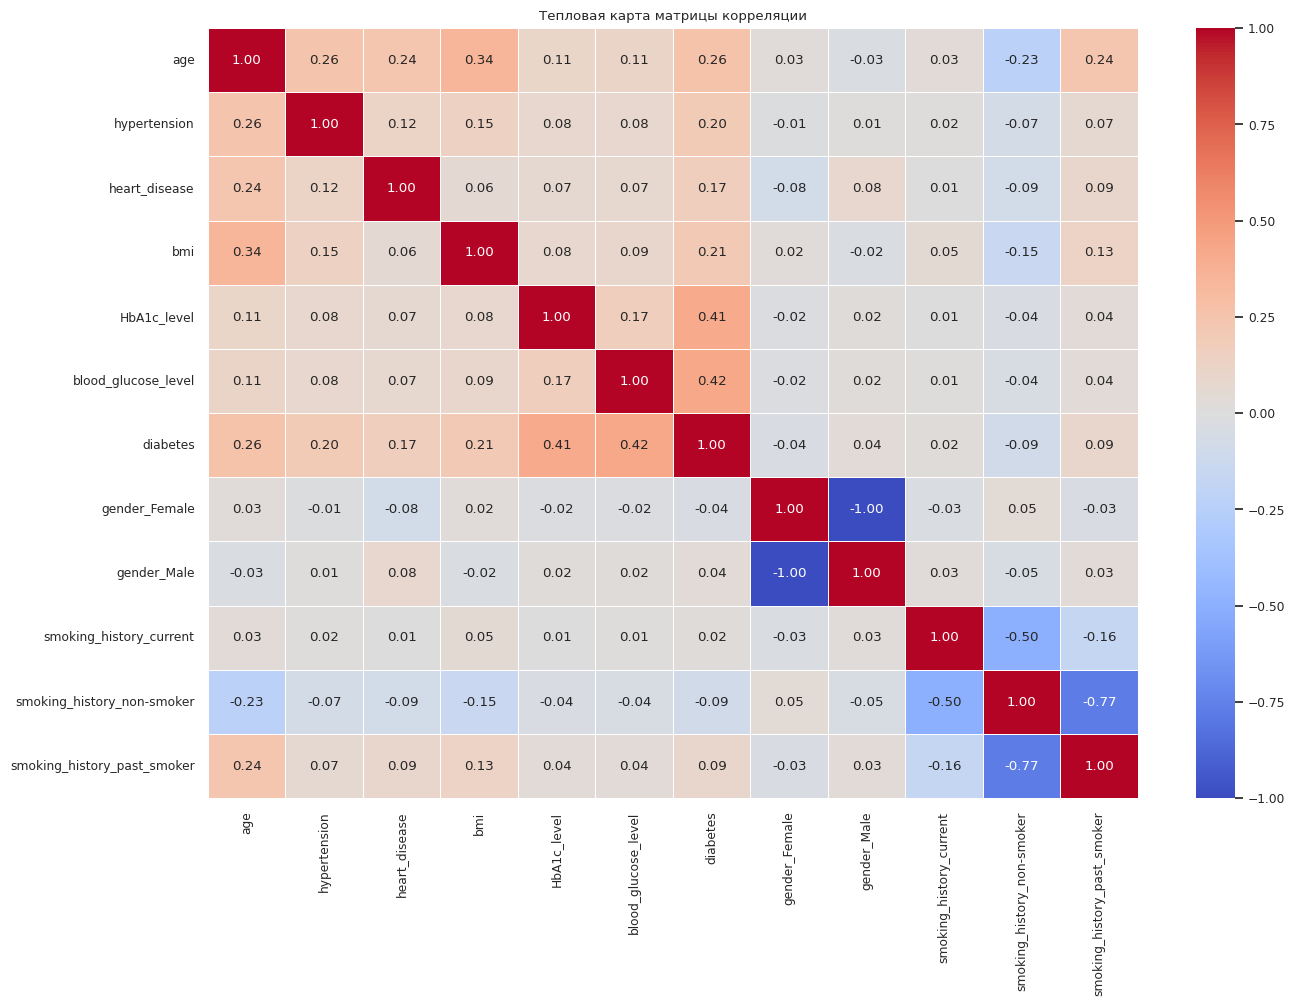

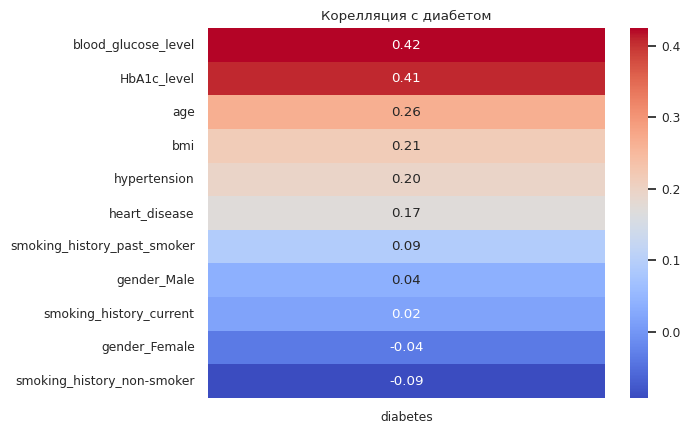

In [ ]:
# Вычислим матрицу корреляции
correlation_matrix = data.corr()
# Граф 1
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта матрицы корреляции")
plt.show()


# Граф 2
# Создадим "тепловую" карту для матрицы корреляции с указанным столбцом
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Отсортируем корреляционные данные в порядке убывания
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корелляция с диабетом')
plt.show()

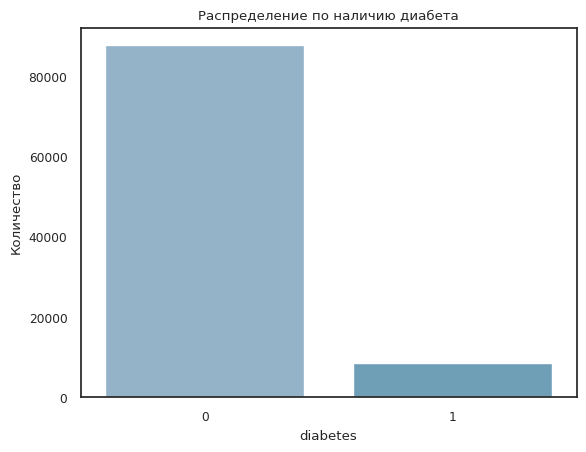

In [ ]:
# Количественная диаграма для людей болеющих и не болеющих диабетом
sns.countplot(x='diabetes', data=df)
plt.title('Распределение по наличию диабета')
plt.ylabel("Количество")
plt.show()

In [ ]:
# Определим ресемплирование
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
cat = ['gender','smoking_history']
num = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
bin_num = ['hypertension','heart_disease']

stndscl = StandardScaler()
ohe = OneHotEncoder()

X = df.drop('diabetes', axis=1)
y = df['diabetes']

numpipe = make_pipeline(stndscl)
coltrans = make_column_transformer((numpipe, num), (ohe, cat), (ohe, bin_num))

# Разделим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = make_pipeline(coltrans, over, under, RandomForestClassifier())

In [ ]:
param_grid = [{
    'randomforestclassifier': [RandomForestClassifier()],
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}]

In [ ]:
grid = RandomizedSearchCV(pipeline,
                          param_grid,
                          cv = 3,
                          random_state=42,
                          verbose=0,
                          scoring='accuracy',
                          n_jobs=-1,
                          error_score=np.nan)

In [ ]:
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'bmi',
                                                                                'HbA1c_level',
                                                                                'blood_glucose_level']),
                                                                              ('onehotencoder-1',
                                                                               OneHotEncoder(),
                                                                               ['gender',
                                                                                'smoking_history']),
                                                                              ('onehotencoder-2',
                                                                               OneHotEncoder(),
                                                                               ['hypertension',
                                                                                'heart_disease...
                   n_jobs=-1,
                   param_distributions=[{'randomforestclassifier': [RandomForestClassifier(max_depth=10,
                                                                                           min_samples_split=5)],
                                         'randomforestclassifier__max_depth': [None,
                                                                               10,
                                                                               20],
                                         'randomforestclassifier__min_samples_leaf': [1,
                                                                                      2,
                                                                                      4],
                                         'randomforestclassifier__min_samples_split': [2,
                                                                                       5,
                                                                                       10],
                                         'randomforestclassifier__n_estimators': [50,
                                                                                  100,
                                                                                  200]}],
                   random_state=42, scoring='accuracy')

In [ ]:
best_model = grid.best_estimator_
best_model.score(X_test, y_test)

0.9483511910953917

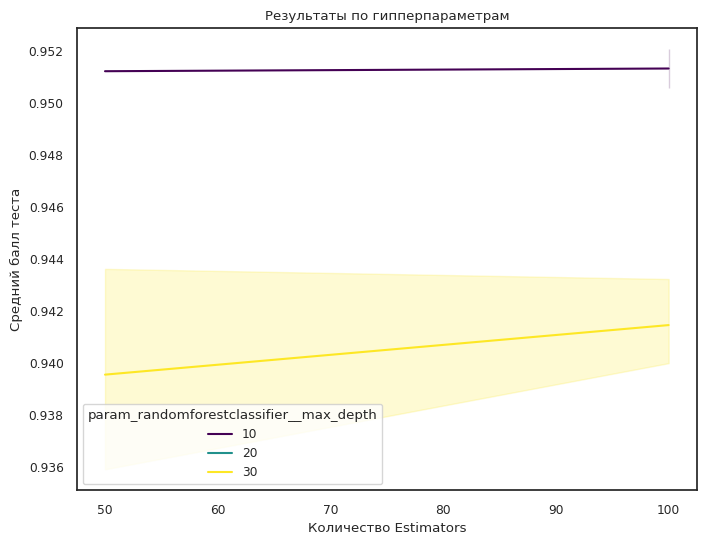

In [ ]:
# Построим линейный график для визуализации результатов по гиперпараметрам
results_df = pd.DataFrame(grid.cv_results_)
results_df['param_randomforestclassifier__max_depth'] = results_df['param_randomforestclassifier__max_depth'].fillna(30)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_randomforestclassifier__n_estimators', y='mean_test_score', hue='param_randomforestclassifier__max_depth', palette='viridis')
plt.title('Результаты по гипперпараметрам')
plt.xlabel('Количество Estimators')
plt.ylabel('Средний балл теста')
plt.show()

Точность модели:  0.9483511910953917
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.73      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



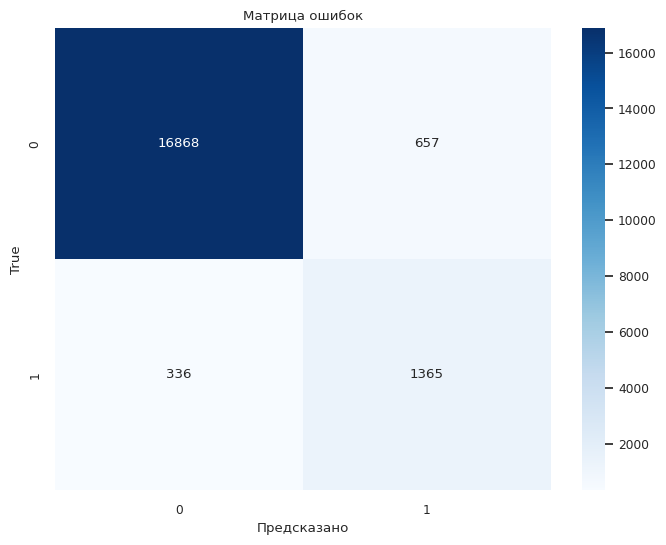

In [ ]:
# Используем лучшую модель, найденную в результате GridSearchCV, для прогнозирования на тестовом наборе и оценки ее производительности.
y_pred = grid.predict(X_test)

# Оценим модель
print("Точность модели: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Выведем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказано')
plt.ylabel('True')
plt.show()

                        Feature  Importance
2                   HbA1c_level        0.43
3           blood_glucose_level        0.30
0                           age        0.12
1                           BMI        0.06
9                hypertension_0        0.02
10               hypertension_1        0.02
11              heart_disease_0        0.01
12              heart_disease_1        0.01
7    smoking_history_non-smoker        0.00
8   smoking_history_past_smoker        0.00
4                 gender_Female        0.00
5                   gender_Male        0.00
6       smoking_history_current        0.00


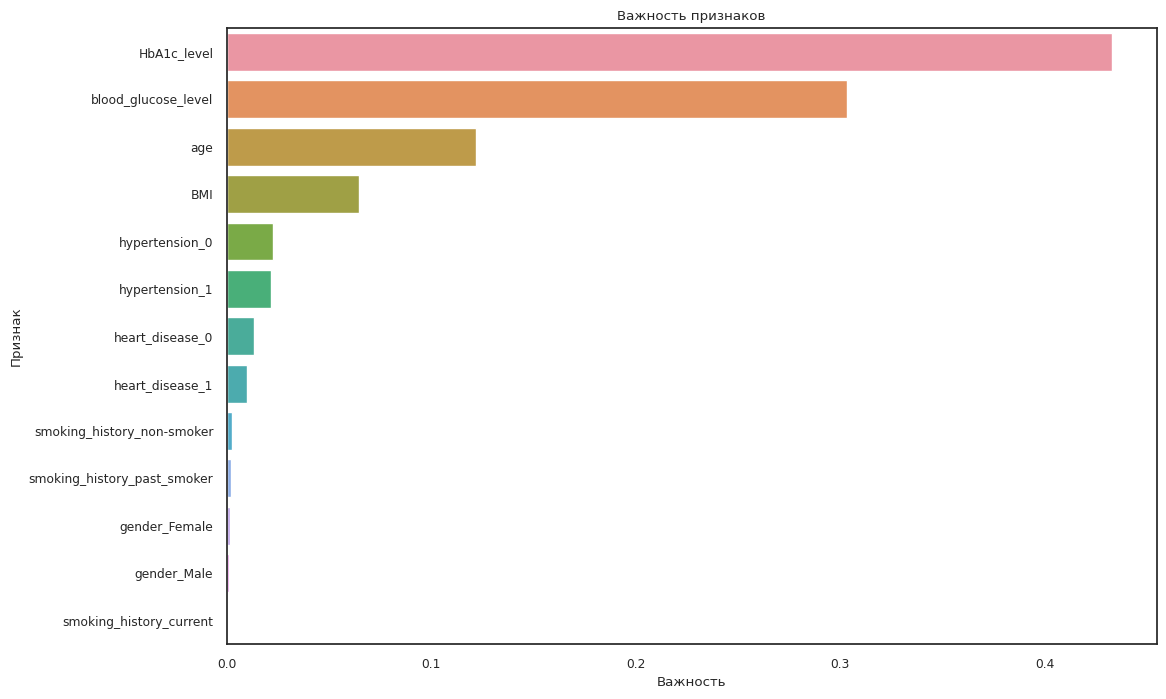

In [ ]:
# Метод возвращает имена признаков после преобразования
onehot_columns = list(grid.best_estimator_.named_steps['columntransformer'].named_transformers_['onehotencoder-1'].get_feature_names_out(['gender', 'smoking_history']))
onehot_columns2 = list(grid.best_estimator_.named_steps['columntransformer'].named_transformers_['onehotencoder-2'].get_feature_names_out(['hypertension', 'heart_disease']))
# Создадим список, содержащий имена числовых признаков и имена преобразованных категориальных признаков
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level'] + onehot_columns + onehot_columns2

# Получим важности признаков
importances = grid.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

# Создадим DataFrame importance_df, содержащий имена признаков и их важности
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Отсортируем DataFrame по важности признаков
importance_df = importance_df.sort_values('Importance', ascending=False)

# Выведем полученный DataFrame
print(importance_df)

# График с важностью признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Важность признаков')
plt.ylabel('Признак')
plt.xlabel('Важность')
plt.show()

In [ ]:
# Создание виджетов для ввода значений признаков
age_widget = widgets.FloatSlider(value=30, min=0, max=100, step=1, description='Возраст:')
bmi_widget = widgets.FloatSlider(value=25, min=10, max=50, step=0.1, description='ИМТ:')
hba1c_widget = widgets.FloatSlider(value=5.5, min=4, max=7, step=0.1, description='Уровень гемоглобина:')
blood_glucose_widget = widgets.FloatSlider(value=100, min=50, max=300, step=1, description='Уровень глюкозы в крови:')
hypertension_widget = widgets.Checkbox(value=False, description='Гипертония')
heart_disease_widget = widgets.Checkbox(value=False, description='Проблемы с сердцем')
gender_widget = widgets.Dropdown(options=['Male', 'Female'], value='Male', description='Пол:')
smoking_history_widget = widgets.Dropdown(options=['non-smoker', 'current', 'past_smoker'], value='non-smoker', description='Статус курящего:')

hba1c_widget.style.description_width = 'initial'  # Это позволит описанию занимать всю доступную ширину
blood_glucose_widget.style.description_width = 'initial'
smoking_history_widget.style.description_width = 'initial'

# Создание кнопки для выполнения прогноза
predict_button = widgets.Button(description='Предсказать')
predict_button.style.button_color = 'cyan'

# Функция для выполнения прогноза по нажатию на кнопку
def make_prediction(b):
    # Получение введенных значений признаков
    age = age_widget.value
    bmi = bmi_widget.value
    hba1c_level = hba1c_widget.value
    blood_glucose_level = blood_glucose_widget.value
    hypertension = hypertension_widget.value
    heart_disease = heart_disease_widget.value
    gender = gender_widget.value
    smoking_history = smoking_history_widget.value

    # Подготовка введенных значений в формате DataFrame
    input_data = pd.DataFrame({
        'age': [age],
        'bmi': [bmi],
        'HbA1c_level': [hba1c_level],
        'blood_glucose_level': [blood_glucose_level],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'gender': [gender],
        'smoking_history': [smoking_history]
    })

    # Выполнение прогноза с использованием обученной модели
    prediction = grid.predict(input_data)

    # Вывод результата
    if prediction == 1:
        result_label.value = "Человек, возможно, болен диабетом."
    else:
        result_label.value = "Человек, вероятно, не болен диабетом."

# Привязка функции к событию нажатия кнопки
predict_button.on_click(make_prediction)

# Создание виджета для вывода результата
result_label = widgets.Label(value='')

# Отображение виджетов
display(age_widget, bmi_widget, hba1c_widget, blood_glucose_widget, hypertension_widget, heart_disease_widget, gender_widget, smoking_history_widget, predict_button, result_label)

FloatSlider(value=30.0, description='Возраст:', step=1.0)

FloatSlider(value=25.0, description='ИМТ:', max=50.0, min=10.0)

FloatSlider(value=5.5, description='Уровень гемоглобина:', max=7.0, min=4.0, style=SliderStyle(description_wid…

FloatSlider(value=100.0, description='Уровень глюкозы в крови:', max=300.0, min=50.0, step=1.0, style=SliderSt…

Checkbox(value=False, description='Гипертония')

Checkbox(value=False, description='Проблемы с сердцем')

Dropdown(description='Пол:', options=('Male', 'Female'), value='Male')

Dropdown(description='Статус курящего:', options=('non-smoker', 'current', 'past_smoker'), style=DescriptionSt…

Button(description='Предсказать', style=ButtonStyle(button_color='cyan'))

Label(value='')